<a href="https://colab.research.google.com/github/Rogerio-mack/game_q/blob/main/geq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [302]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Data Preparation

In [303]:
df = pd.read_excel('https://github.com/Rogerio-mack/game_q/raw/refs/heads/main/Pos_Jogo.xlsx', skiprows=1, header=0, index_col=0)
df = df.iloc[:,2:-1]
df = df.reset_index(drop=True)
display(df.head())

questionario = 'Pós-Jogo'

,Eu me senti revigorado,Eu me senti mal,Achei difícil voltar à realidade,Eu me senti culpado.,Foi como uma vitória,Achei uma perda de tempo,Eu me senti energizado,Eu me senti satisfeito,Eu me senti desorientado,Eu me senti exausto,Senti que poderia ter feito coisas mais úteis,Eu me senti poderoso,Eu me senti esgotado,Senti remorso,Eu me senti envergonhado,Eu me senti orgulhoso,Tive a sensação de ter voltado de uma viagem
0,moderadamente (2),nada (0),nada (0),nada (0),nada (0),ligeiramente (1),moderadamente (2),moderadamente (2),bastante (3),moderadamente (2),moderadamente (2),nada (0),ligeiramente (1),ligeiramente (1),nada (0),moderadamente (2),nada (0)
1,moderadamente (2),nada (0),nada (0),nada (0),bastante (3),nada (0),moderadamente (2),moderadamente (2),moderadamente (2),moderadamente (2),moderadamente (2),moderadamente (2),nada (0),nada (0),nada (0),bastante (3),nada (0)
2,ligeiramente (1),nada (0),nada (0),nada (0),ligeiramente (1),nada (0),moderadamente (2),moderadamente (2),nada (0),nada (0),ligeiramente (1),nada (0),nada (0),nada (0),nada (0),ligeiramente (1),nada (0)
3,nada (0),ligeiramente (1),nada (0),nada (0),nada (0),ligeiramente (1),nada (0),nada (0),moderadamente (2),nada (0),nada (0),nada (0),nada (0),nada (0),nada (0),nada (0),nada (0)
4,moderadamente (2),nada (0),nada (0),nada (0),moderadamente (2),nada (0),bastante (3),extremamente (4),nada (0),nada (0),nada (0),ligeiramente (1),nada (0),nada (0),nada (0),bastante (3),nada (0)


In [304]:
def create_value_counts_dataframe(df):
    new_df = pd.DataFrame(index=df.columns)
    for col in df.columns:
        value_counts = df[col].value_counts()
        for value, count in value_counts.items():
            new_df.loc[col, value] = count
    return new_df

df_counts = create_value_counts_dataframe(df)

df_counts= df_counts.iloc[:, [2, 1, 0, 3, 4]]
df_counts['total'] = df_counts.sum(axis=1)
df_counts.fillna(0, inplace=True)
df_counts = df_counts.astype(int)

display(df_counts)



,nada (0),ligeiramente (1),moderadamente (2),bastante (3),extremamente (4),total
Eu me senti revigorado,21,24,47,17,6,115
Eu me senti mal,88,13,11,1,2,115
Achei difícil voltar à realidade,86,14,15,0,0,115
Eu me senti culpado.,87,12,14,2,0,115
Foi como uma vitória,24,32,25,20,14,115
Achei uma perda de tempo,79,23,10,2,1,115
Eu me senti energizado,25,29,37,15,9,115
Eu me senti satisfeito,12,20,39,27,17,115
Eu me senti desorientado,83,14,12,4,2,115
Eu me senti exausto,81,20,11,1,2,115


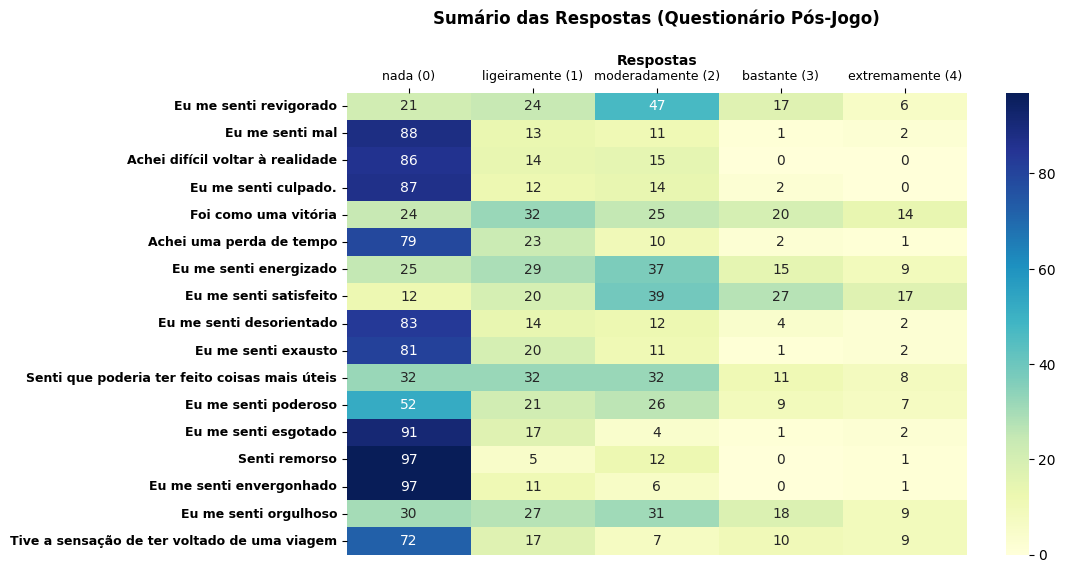

In [305]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(df_counts.drop(columns='total'), annot=True, fmt=".0f", cmap="YlGnBu")

ax.set_title("Sumário das Respostas (Questionário " + questionario + ")\n",fontsize=12,weight='bold')
# plt.xlabel("Respostas") # Remove the xlabel

ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(),rotation=0,fontsize=9)
ax.set_yticks(ax.get_yticks(),ax.get_yticklabels(),rotation=0,fontsize=9, weight='bold')

# Place x-axis labels on top
ax.xaxis.tick_top() # Move x-axis ticks to the top
ax.xaxis.set_label_position('top') # Move x-axis label to the top

# Set the xlabel
ax.set_xlabel("Respostas", fontsize=10, weight='bold')

plt.show()


In [306]:
questions = df.columns.to_list()
display(questions)
df.columns = [f'Q{i+1}' for i in range(0,df.shape[1])]
display(df.head())

['Eu me senti revigorado',
 'Eu me senti mal',
 'Achei difícil voltar à realidade',
 'Eu me senti culpado.',
 'Foi como uma vitória',
 'Achei uma perda de tempo',
 'Eu me senti energizado',
 'Eu me senti satisfeito',
 'Eu me senti desorientado',
 'Eu me senti exausto',
 'Senti que poderia ter feito coisas mais úteis',
 'Eu me senti poderoso',
 'Eu me senti esgotado',
 'Senti remorso',
 'Eu me senti envergonhado',
 'Eu me senti orgulhoso',
 'Tive a sensação de ter voltado de uma viagem']

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17
0,moderadamente (2),nada (0),nada (0),nada (0),nada (0),ligeiramente (1),moderadamente (2),moderadamente (2),bastante (3),moderadamente (2),moderadamente (2),nada (0),ligeiramente (1),ligeiramente (1),nada (0),moderadamente (2),nada (0)
1,moderadamente (2),nada (0),nada (0),nada (0),bastante (3),nada (0),moderadamente (2),moderadamente (2),moderadamente (2),moderadamente (2),moderadamente (2),moderadamente (2),nada (0),nada (0),nada (0),bastante (3),nada (0)
2,ligeiramente (1),nada (0),nada (0),nada (0),ligeiramente (1),nada (0),moderadamente (2),moderadamente (2),nada (0),nada (0),ligeiramente (1),nada (0),nada (0),nada (0),nada (0),ligeiramente (1),nada (0)
3,nada (0),ligeiramente (1),nada (0),nada (0),nada (0),ligeiramente (1),nada (0),nada (0),moderadamente (2),nada (0),nada (0),nada (0),nada (0),nada (0),nada (0),nada (0),nada (0)
4,moderadamente (2),nada (0),nada (0),nada (0),moderadamente (2),nada (0),bastante (3),extremamente (4),nada (0),nada (0),nada (0),ligeiramente (1),nada (0),nada (0),nada (0),bastante (3),nada (0)


In [307]:
replace_map = {
    'moderadamente (2)': 2,
    'ligeiramente (1)': 1,
    'nada (0)': 0,
    'bastante (3)': 3,
    'extremamente (4)': 4
}

pd.set_option('future.no_silent_downcasting', True)
df = df.replace(replace_map)
display(df.head())

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17
0,2,0,0,0,0,1,2,2,3,2,2,0,1,1,0,2,0
1,2,0,0,0,3,0,2,2,2,2,2,2,0,0,0,3,0
2,1,0,0,0,1,0,2,2,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0
4,2,0,0,0,2,0,3,4,0,0,0,1,0,0,0,3,0


# PCA

## Construtos GEQ

| Escala            | Objetivo                                                        | Características                                                                                |
| ----------------- | --------------------------------------------------------------- | --------------------------------------------------------------------------------------------- |
| Immersion         | Medir o envolvimento e conexão com o jogo.                      | Imersão sensorial e imaginativa, equilíbrio entre desafio e imersão.                           |
| Flow              | Avaliar o estado de foco, prazer e perda da autoconsciência.   | Equilíbrio entre desafio e habilidades do jogador.                                               |
| Competence        | Medir o senso de habilidade e maestria.                         | Capacidade de superar desafios e controlar eventos no jogo.                                      |
| Tension           | Avaliar sentimentos negativos como frustração e ansiedade.     | Problemas de usabilidade, dificuldades excessivas.                                               |
| Negative Affect   | Medir emoções negativas gerais.                                | Tédio, tristeza, raiva.                                                                         |
| Positive Affect   | Avaliar emoções positivas gerais.                                | Alegria, entusiasmo, excitação.                                                                    |
| Presence          | Medir a sensação de "estar lá" no mundo do jogo.                  | Percepção de realidade do ambiente virtual.                                                        |


## Validação da Estrutura Teórica

Se adequado, os componentes principais devem corresponder aos construtos teóricos originais (as escalas do GEQ) fornecendo evidências de que o questionário está medindo o que se propõe a medir.

Variância explicada por componente:
 [0.26314045 0.24454474 0.07815663 0.06076691 0.05594077 0.04941558
 0.03937567 0.03756293 0.02995421 0.02765477 0.02302073 0.01922286
 0.01861584 0.01718047 0.01487793 0.01082871 0.00974081]

Variância explicada cumulativa:
 [0.26314045 0.50768519 0.58584181 0.64660872 0.70254949 0.75196507
 0.79134075 0.82890368 0.85885788 0.88651266 0.90953339 0.92875624
 0.94737208 0.96455255 0.97943048 0.99025919 1.        ]


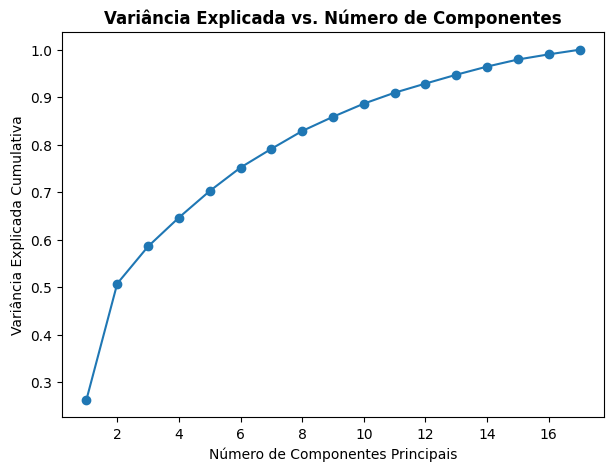

In [308]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Padronização dos dados (importante para PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Aplica PCA
pca = PCA() # n_components=None -> mantém todos os componentes
pca.fit(scaled_data)

# Variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Variância explicada por componente:\n", explained_variance)

# Variância explicada cumulativa
cumulative_variance = np.cumsum(explained_variance)
print("\nVariância explicada cumulativa:\n", cumulative_variance)

# Visualização (opcional, mas muito útil)
plt.figure(figsize=(7,5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Número de Componentes Principais")
plt.ylabel("Variância Explicada Cumulativa")
plt.title("Variância Explicada vs. Número de Componentes",fontsize=12,weight='bold')

plt.show()


In [309]:
# Eigenvalues
eigenvalues = pca.explained_variance_
print("\nEigenvalues:\n", eigenvalues)

# Aplica a regra de Kaiser
num_componentes_kaiser = sum(eigenvalues > 1)
print("\nNúmero de componentes segundo a regra de Kaiser:", num_componentes_kaiser)



Eigenvalues:
 [4.51262789 4.1937277  1.34031757 1.04209918 0.95933515 0.84743391
 0.67525825 0.64417131 0.51368836 0.47425513 0.39478532 0.32965511
 0.31924525 0.29463001 0.25514347 0.18570291 0.16704628]

Número de componentes segundo a regra de Kaiser: 4


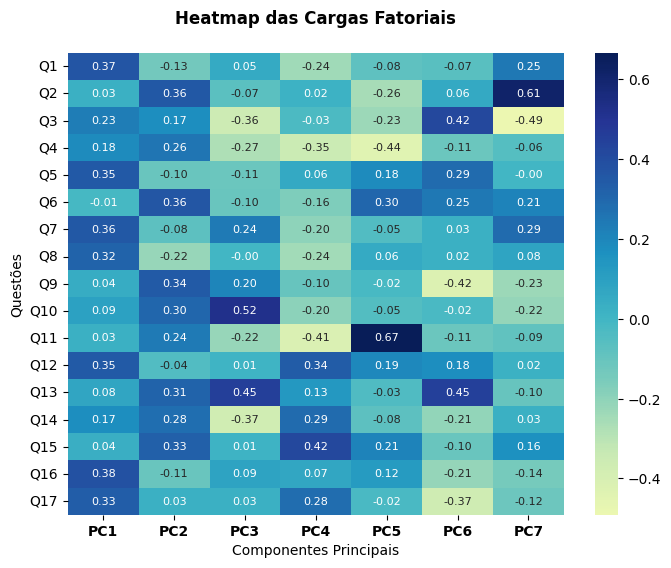

In [310]:
# Número de componentes
n_components = 7

# Padronização dos dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Aplica PCA
pca = PCA(n_components=n_components)
pca.fit(scaled_data)

# Obtém as cargas fatorias
loadings = pca.components_.T  # Transposta para ter variáveis nas linhas

# Cria um DataFrame com as cargas fatorias
loadings_df = pd.DataFrame(loadings,
                           index=df.columns,
                           columns=[f'PC{i+1}' for i in range(n_components)]) # Nomes dos componentes

# Cria o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(loadings_df, annot=True, fmt=".2f", cmap="YlGnBu", center=0, annot_kws={"fontsize": 8}) # center=0 centraliza a escala de cores
plt.title("Heatmap das Cargas Fatoriais\n",fontsize=12,weight='bold')
plt.xlabel("Componentes Principais")
plt.ylabel("Questões")
plt.yticks(fontsize=10)
plt.xticks(fontsize=10, weight='bold')
plt.show()


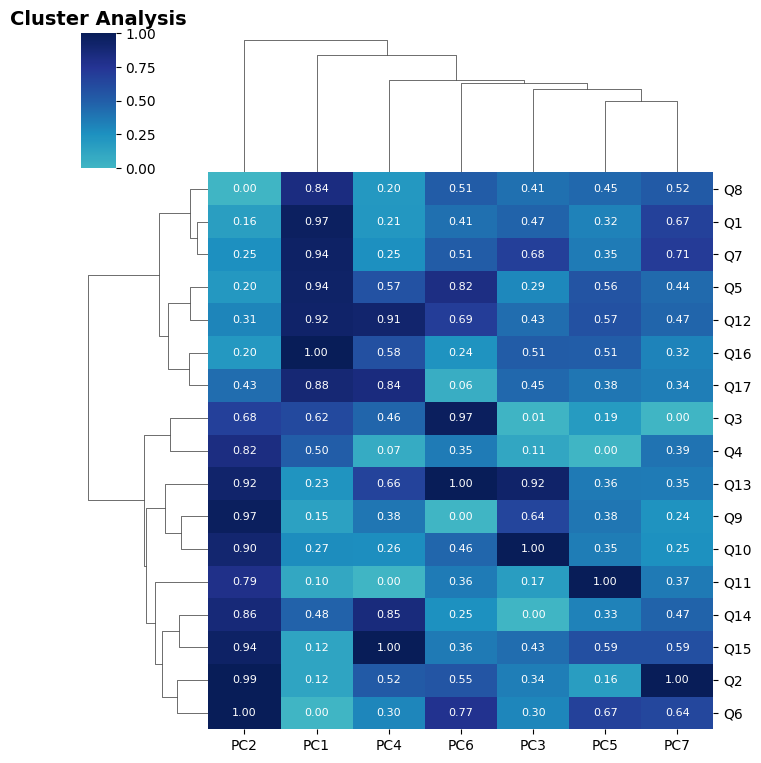

In [311]:
sns.clustermap(loadings_df, metric='euclidean', standard_scale=1, method='ward',
               annot=True, fmt=".2f", cmap="YlGnBu", center=0, annot_kws={"fontsize": 8},
               figsize=(7,7.5))
plt.title('Cluster Analysis', fontsize=14, weight='bold')
plt.show()

## Loadings Matrix $\times$ Structure Matrix

* **Matriz de Cargas Fatoriais (Loadings Matrix)**: Correlação entre variáveis e fatores, levando em conta a correlação entre os fatores (mais relevante com rotação oblíqua).
* **Matriz de Estrutura (Structure Matrix)**: Correlação direta entre variáveis e fatores, sem levar em conta a correlação entre os fatores (útil com rotação oblíqua).

Atenção: Se estiver usando rotação Varimax (ortogonal), as duas matrizes são iguais.

# Factor Analysis

In [312]:
!pip install factor_analyzer

Número de componentes para explicar 90% da variância: 11

Cargas Fatoriais Rotacionadas (Varimax):
 [[ 0.81089011 -0.08506271 -0.034506    0.15362365 -0.03906391 -0.10475108
  -0.12821607]
 [-0.12012159  0.55603247  0.30651233  0.28048466  0.06025682 -0.02599046
  -0.15698469]
 [ 0.26892276  0.30799466  0.05763327  0.41023987  0.08020776  0.32442916
   0.00135119]
 [ 0.13357312  0.25897129  0.16521676  0.935529    0.10645229 -0.04511965
   0.01724843]
 [ 0.7123895  -0.00548389 -0.09667468  0.07278778  0.04761463  0.34182238
   0.05452655]
 [-0.18868949  0.43941318  0.31410865  0.15383579  0.37874205  0.10028841
  -0.13413732]
 [ 0.77903493 -0.04980943  0.15810187  0.0579655  -0.04556723 -0.09639304
  -0.1829063 ]
 [ 0.74472608 -0.21995751 -0.17649975  0.03899041 -0.0113703  -0.01207986
  -0.12534595]
 [-0.06248733  0.40880026  0.47990128  0.1534752   0.17628012 -0.24360618
   0.11722924]
 [ 0.06193056  0.13108791  0.80542712  0.1413288   0.11469967 -0.15972276
   0.09131305]
 [-0.02800

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


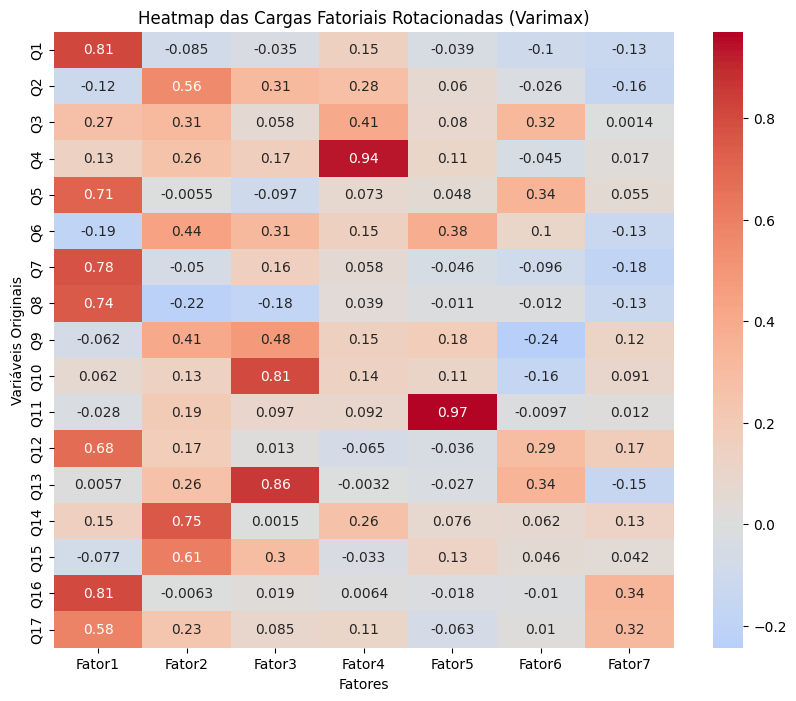

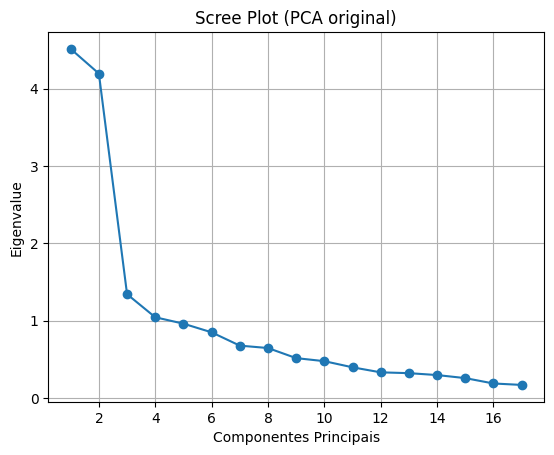

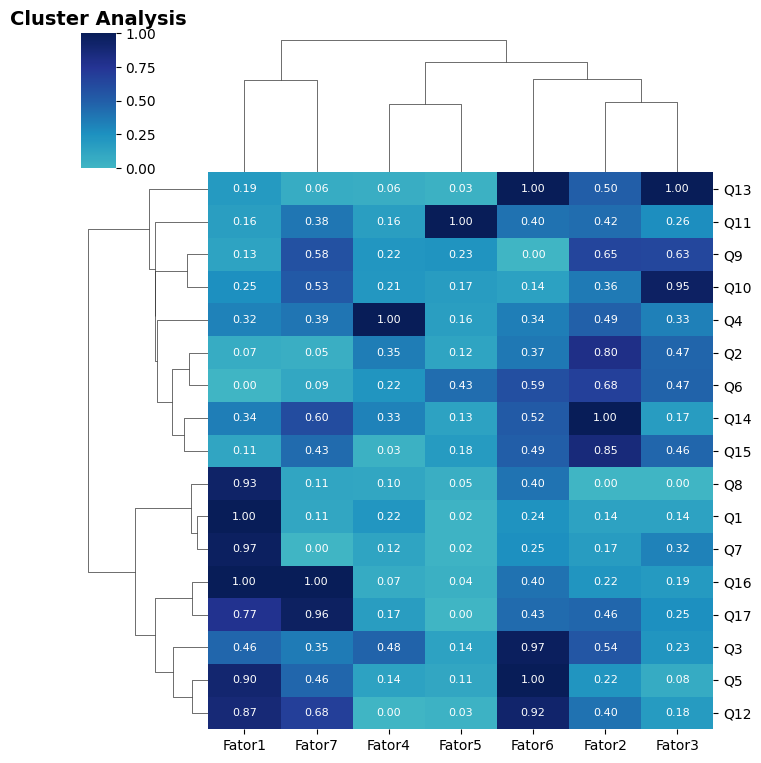

In [313]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from factor_analyzer.rotator import Rotator
import numpy as np

# 1. Dados de exemplo (substitua pelos seus dados)
df

# 2. Padronização dos dados (importante para PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 3. Aplica PCA para determinar o número de componentes (opcional)
#    Se você já sabe quantos componentes quer, pode pular esta etapa.
pca = PCA()
pca.fit(scaled_data)

# Variância explicada cumulativa
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Escolha o número de componentes que explica uma variância aceitável (ex: 90%)
n_components = np.argmax(cumulative_variance >= 0.9) + 1 # Encontra o primeiro índice onde cumulativo >= 90%
print(f"Número de componentes para explicar 90% da variância: {n_components}")

#
#
n_components = 7
#
#

# 4. Análise Fatorial com Rotação Varimax
fa = FactorAnalyzer(n_factors=n_components, rotation='varimax')
fa.fit(scaled_data)

# 5. Obtém as cargas fatorias rotacionadas
loadings = fa.loadings_
print("\nCargas Fatoriais Rotacionadas (Varimax):\n", loadings)

# 6. Visualização (opcional) - Heatmap das Cargas Fatoriais Rotacionadas
import seaborn as sns
import matplotlib.pyplot as plt

loadings_df = pd.DataFrame(loadings,
                           index=df.columns,
                           columns=[f'Fator{i+1}' for i in range(n_components)])

plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title("Heatmap das Cargas Fatoriais Rotacionadas (Varimax)")
plt.xlabel("Fatores")
plt.ylabel("Variáveis Originais")
plt.show()


# 7. Visualização (opcional) - Scree Plot dos Eigenvalues do PCA original

import matplotlib.pyplot as plt

eigenvalues = pca.explained_variance_
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot (PCA original)')
plt.xlabel('Componentes Principais')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# 8. Cluster...

sns.clustermap(loadings_df, metric='euclidean', standard_scale=1, method='ward',
               annot=True, fmt=".2f", cmap="YlGnBu", center=0, annot_kws={"fontsize": 8},
               figsize=(7,7.5))
plt.title('Cluster Analysis', fontsize=14, weight='bold')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Estrutura:
 [[ 0.84113261  0.61172591 -0.04566431 -0.05926265  0.22818455 -0.06664153
  -0.14477082]
 [-0.11220552 -0.14330659  0.42792953  0.62652415  0.44478367  0.25157145
   0.19697269]
 [ 0.22922927  0.28874808  0.2458095   0.40096724  0.51179808  0.18719165
  -0.25785853]
 [ 0.194139    0.11608627  0.20590395  0.44251791  1.00022137  0.27139522
   0.11556384]
 [ 0.64143248  0.68026674  0.03643674  0.02492278  0.15036008  0.02203681
  -0.44893357]
 [-0.20541289 -0.18787453  0.44248479  0.51605702  0.3165363   0.52304545
   0.13580054]
 [ 0.81208781  0.56713852  0.14539233 -0.01620324  0.17419461 -0.04683142
  -0.04022199]
 [ 0.76830223  0.55792735 -0.17960203 -0.22578113  0.05274659 -0.09881945
  -0.28346325]
 [-0.09018457  0.00172349  0.43773788  0.49539796  0.34897318  0.3425353
   0.51148916]
 [ 0.0685889   0.09357345  0.69457527  0.27195909  0.32972087  0.26564785
   0.6145392 ]
 [-0.07496549 -0.02898804  0.13520915  0.27045545  0.24567811  0.99701369
   0.09767761]
 [ 0.5586

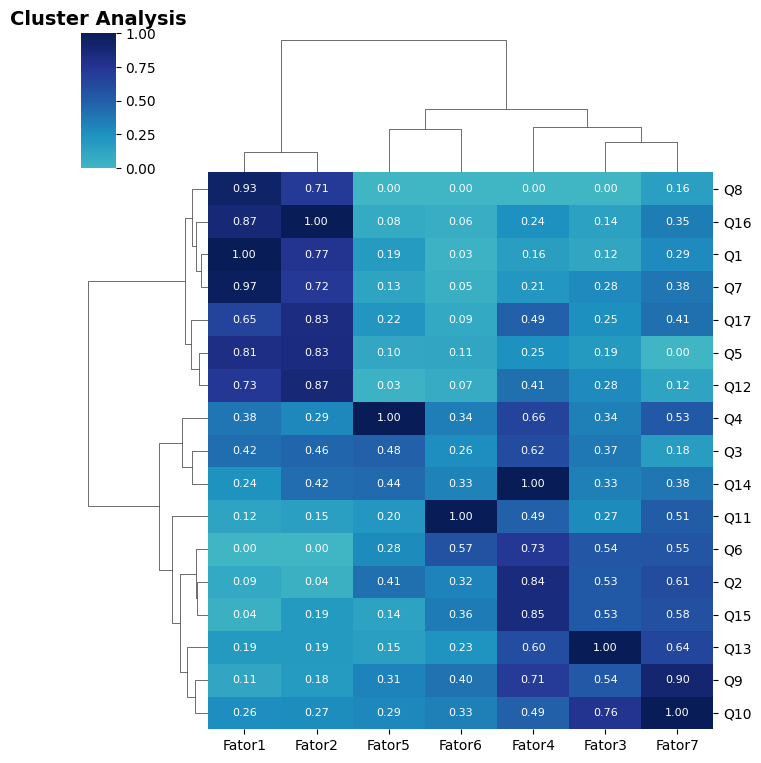

In [314]:
# 2. Padronização dos dados (importante para PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

fa = FactorAnalyzer(n_factors=n_components, rotation='oblimin')
fa.fit(scaled_data)
structure_matrix = fa.structure_

# 5. Obtém a estrutura
structure_matrix = fa.structure_
print("\nEstrutura:\n", structure_matrix)

structure_df = pd.DataFrame(structure_matrix,
                           index=df.columns,
                           columns=[f'Fator{i+1}' for i in range(n_components)])
# 8. Cluster...

sns.clustermap(structure_df, metric='euclidean', standard_scale=1, method='ward',
               annot=True, fmt=".2f", cmap="YlGnBu", center=0, annot_kws={"fontsize": 8},
               figsize=(7,7.5))
plt.title('Cluster Analysis', fontsize=14, weight='bold')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Cargas Fatoriais (Pattern Matrix):
 [[ 8.29431884e-01 -6.09096515e-02  2.04681769e-02  6.99986818e-02
  -1.57225232e-02 -2.77948208e-02 -5.74801400e-04]
 [-4.43748682e-02  8.09914074e-02  6.17360977e-01  1.37078144e-01
  -9.57934745e-02 -1.24406222e-02 -1.59355421e-01]
 [ 9.47255115e-02  1.54461446e-02  1.31159717e-01  3.84442165e-01
   1.08077086e-02  4.48509816e-01  9.98094031e-03]
 [-7.13872061e-02  8.63599454e-02 -7.81342240e-02  1.03781107e+00
  -1.37009535e-02  1.90160682e-01  5.37603984e-02]
 [ 5.51190065e-01 -2.20823540e-02 -9.84954326e-02  2.89519154e-02
   9.55590934e-02  4.28461599e-01  1.19656450e-01]
 [-1.05821110e-01  1.54759617e-01  3.49583444e-01  1.77749036e-02
   2.92347943e-01  1.06392398e-01 -1.77991445e-01]
 [ 8.52096964e-01  1.51964293e-01  4.71438584e-02 -6.55809242e-02
  -4.18425600e-02 -3.89769380e-02 -5.36934248e-02]
 [ 7.51407916e-01 -1.53035529e-01 -1.20874940e-01 -1.43674283e-02
   5.68449927e-02  4.86036336e-02 -2.93094552e-02]
 [-9.00938090e-03  3.542426

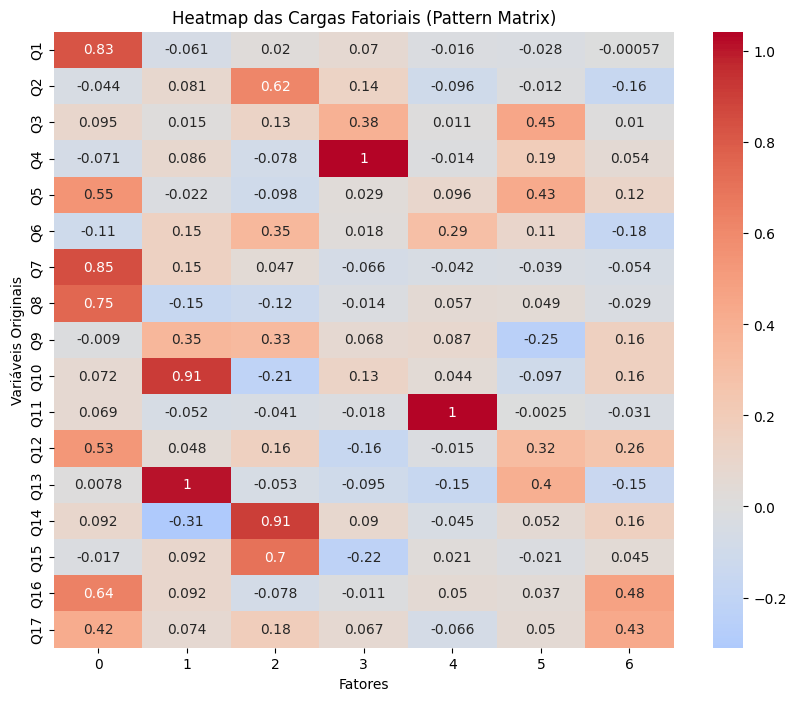

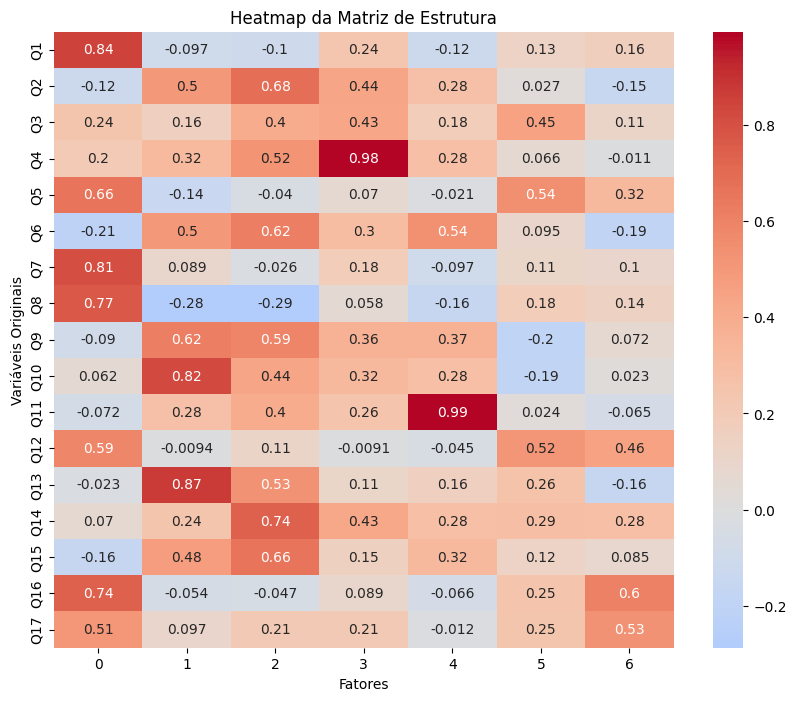

In [315]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Padronização dos dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 3. Análise Fatorial com Rotação Promax
fa = FactorAnalyzer(n_factors=n_components, rotation='promax') # Rotação Promax
fa.fit(scaled_data)

# 4. Obtém as cargas fatorias (pattern matrix) e a matriz de estrutura
loadings = fa.loadings_
structure = fa.structure_

print("\nCargas Fatoriais (Pattern Matrix):\n", loadings)
print("\nMatriz de Estrutura:\n", structure)

# 5. Visualização (Heatmaps)
# Heatmap das Cargas Fatoriais (Pattern Matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(loadings, index=df.columns), annot=True, cmap='coolwarm', center=0)
plt.title("Heatmap das Cargas Fatoriais (Pattern Matrix)")
plt.xlabel("Fatores")
plt.ylabel("Variáveis Originais")
plt.show()

# Heatmap da Matriz de Estrutura
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(structure, index=df.columns), annot=True, cmap='coolwarm', center=0)
plt.title("Heatmap da Matriz de Estrutura")
plt.xlabel("Fatores")
plt.ylabel("Variáveis Originais")
plt.show()


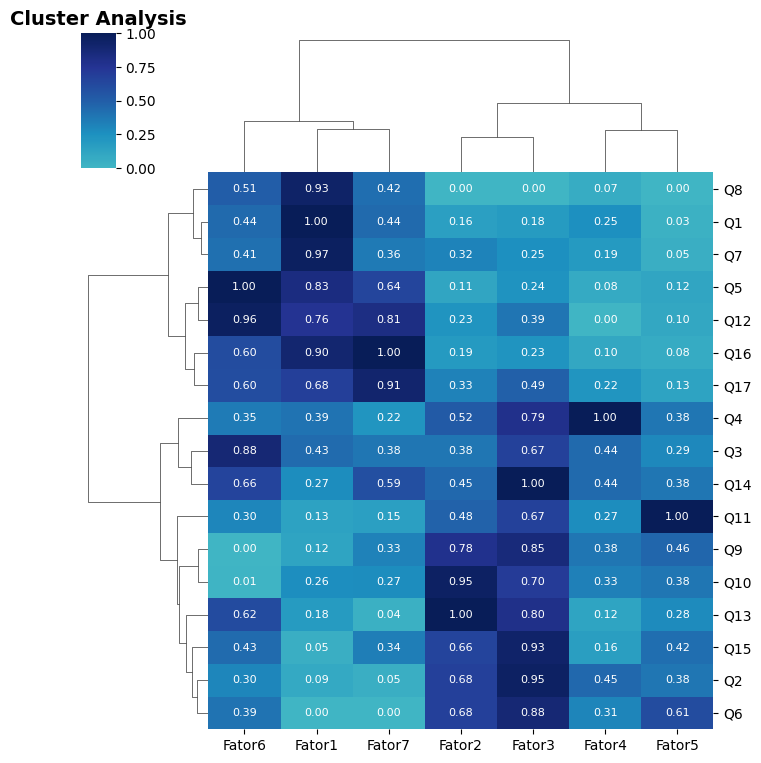

In [316]:
structure_df = pd.DataFrame(structure,
                           index=df.columns,
                           columns=[f'Fator{i+1}' for i in range(n_components)])

sns.clustermap(structure_df, metric='euclidean', standard_scale=1, method='ward',
               annot=True, fmt=".2f", cmap="YlGnBu", center=0, annot_kws={"fontsize": 8},
               figsize=(7,7.5))
plt.title('Cluster Analysis', fontsize=14, weight='bold')
plt.show()

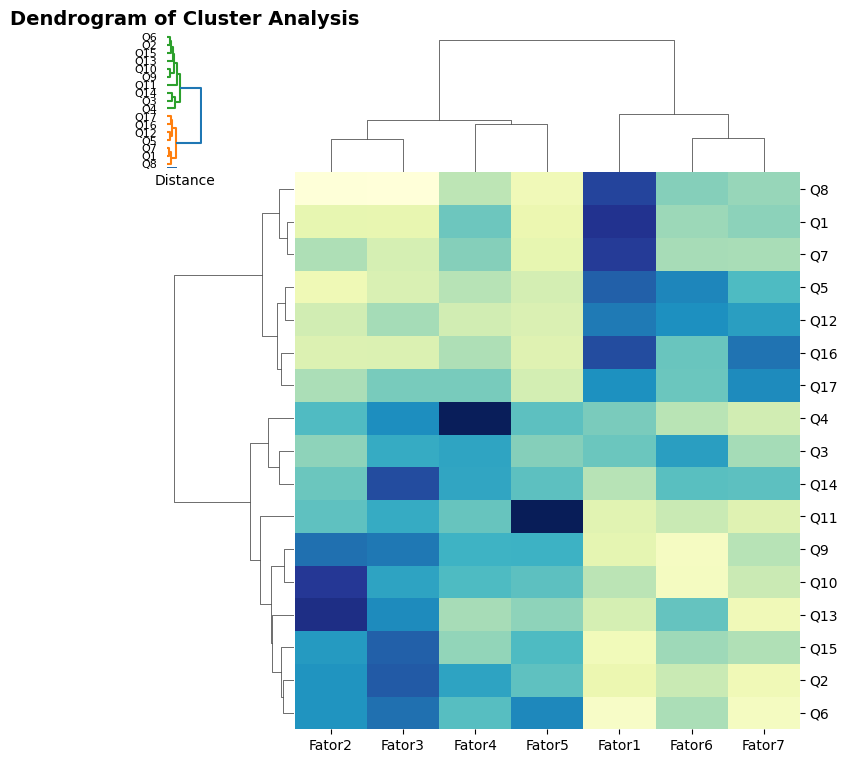

In [317]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# ... (seu código existente) ...

# 8. Cluster (apenas dendrograma)

linkage_matrix = sns.clustermap(structure_df, metric='euclidean', method='ward', cmap="YlGnBu",
                               figsize=(7,7.5)).dendrogram_row.linkage

# Plot do dendrograma
dendrogram(linkage_matrix, labels=structure_df.index, orientation='right', leaf_font_size=8)
plt.title('Dendrogram of Cluster Analysis', fontsize=14, weight='bold')
plt.xlabel("Distance")
plt.show()


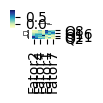

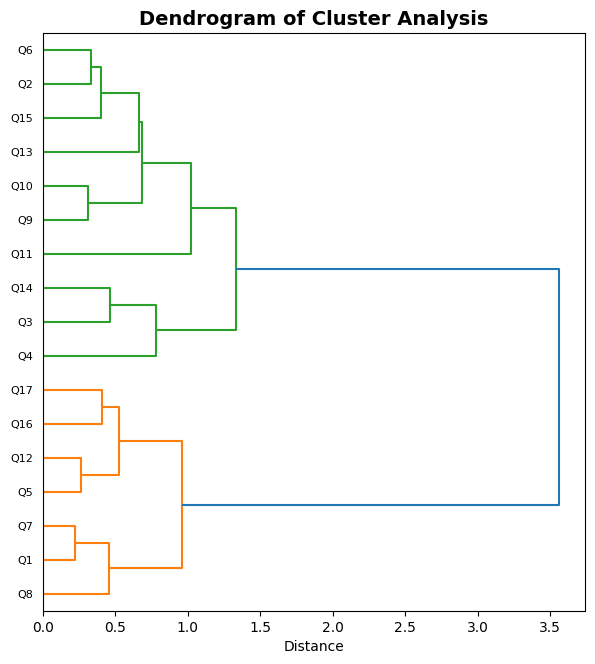

In [318]:
# 8. Cluster (apenas dendrograma)

linkage_matrix = sns.clustermap(structure_df, metric='euclidean', method='ward', cmap="YlGnBu",
                               figsize=(1,1)).dendrogram_row.linkage

# Plot do dendrograma
plt.figure(figsize=(7, 7.5)) # Define o tamanho da figura para o dendrograma
dendrogram(linkage_matrix, labels=structure_df.index, orientation='right', leaf_font_size=8)
plt.title('Dendrogram of Cluster Analysis', fontsize=14, weight='bold')
plt.xlabel("Distance")
plt.show()


In [319]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import numpy as np

# 2. Padronização dos dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 3. Análise Fatorial
fa = FactorAnalyzer(n_factors=n_components, rotation='varimax') # Ou 'promax' ou 'oblimin'
fa.fit(scaled_data)

# 4. Obtém as comunalidades
communalities = fa.get_communalities()

# Imprime as comunalidades
print("Comunalidades:\n", communalities)

# 5. Visualização (opcional): DataFrame com as comunalidades
communalities_df = pd.DataFrame({'Comunalidade': communalities}, index=df.columns)
print("\nDataFrame com as Comunalidades:\n", communalities_df)

print("\nMédia das Comunalidades:", communalities_df['Comunalidade'].mean())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Comunalidades:
 [0.71850746 0.52517334 0.4504879  1.00108438 0.64425576 0.52251348
 0.6825553  0.65165746 0.52904354 0.73671156 0.99705087 0.61233062
 0.94548133 0.68665826 0.487784   0.76744664 0.51597529]

DataFrame com as Comunalidades:
      Comunalidade
Q1       0.718507
Q2       0.525173
Q3       0.450488
Q4       1.001084
Q5       0.644256
Q6       0.522513
Q7       0.682555
Q8       0.651657
Q9       0.529044
Q10      0.736712
Q11      0.997051
Q12      0.612331
Q13      0.945481
Q14      0.686658
Q15      0.487784
Q16      0.767447
Q17      0.515975

Média das Comunalidades: 0.674983364735519


In [320]:
fa = FactorAnalyzer(n_factors=n_components, rotation='varimax')
fa.fit(scaled_data)

fa.get_communalities()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([0.71850746, 0.52517334, 0.4504879 , 1.00108438, 0.64425576,
       0.52251348, 0.6825553 , 0.65165746, 0.52904354, 0.73671156,
       0.99705087, 0.61233062, 0.94548133, 0.68665826, 0.487784  ,
       0.76744664, 0.51597529])

In [321]:
# Criar e ajustar o modelo de análise fatorial
fa = FactorAnalyzer(n_factors=n_components, rotation='varimax')
fa.fit(df)

# Extraindo cargas fatoriais
factor_loadings = fa.loadings_
display(factor_loadings)

loadings_df = pd.DataFrame(factor_loadings, index=df.columns, columns=[f'Fator_{i+1}' for i in range(factor_loadings.shape[1])])
# display(loadings_df)
display(fa.get_communalities())
display(fa.get_communalities().mean())

fa = FactorAnalyzer(n_factors=3, rotation='oblimin')
fa.fit(df)

fa.structure_




/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([[ 0.81089008, -0.08506271, -0.03450599,  0.15362364, -0.03906392,
        -0.10475102, -0.12821604],
       [-0.12012156,  0.55603269,  0.30651222,  0.28048456,  0.06025675,
        -0.02599059, -0.15698472],
       [ 0.26892277,  0.30799473,  0.05763327,  0.41023982,  0.08020775,
         0.32442913,  0.00135124],
       [ 0.13357313,  0.25897143,  0.1652167 ,  0.93552898,  0.10645228,
        -0.04511966,  0.01724841],
       [ 0.71238951, -0.00548388, -0.09667465,  0.07278778,  0.04761465,
         0.34182239,  0.05452654],
       [-0.18868946,  0.4394133 ,  0.31410857,  0.15383571,  0.37874197,
         0.10028825, -0.13413722],
       [ 0.77903488, -0.04980944,  0.15810187,  0.05796553, -0.04556722,
        -0.09639301, -0.18290617],
       [ 0.74472611, -0.21995755, -0.17649972,  0.03899042, -0.01137028,
        -0.01207982, -0.12534607],
       [-0.06248731,  0.40880033,  0.47990118,  0.15347516,  0.17628011,
        -0.24360628,  0.11722925],
       [ 0.06193056,  0.1310

array([0.71850739, 0.52517346, 0.45048788, 1.00108439, 0.64425578,
       0.52251339, 0.68255518, 0.65165755, 0.52904354, 0.73671128,
       0.99705089, 0.61233066, 0.94548187, 0.68665811, 0.48778387,
       0.7674466 , 0.51597529])

np.float64(0.6749833602895673)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([[ 0.79432407,  0.02840575, -0.02472609],
       [-0.15440564,  0.61899348,  0.46019567],
       [ 0.30219715,  0.54842576,  0.13705827],
       [ 0.17493181,  0.6061483 ,  0.2992958 ],
       [ 0.73208238,  0.14004066, -0.10363437],
       [-0.24177816,  0.58764281,  0.4529966 ],
       [ 0.74131079,  0.03520676,  0.15415119],
       [ 0.74276348, -0.13702882, -0.20644193],
       [-0.1106066 ,  0.49262985,  0.59858064],
       [ 0.02935161,  0.3060415 ,  0.89878144],
       [-0.09145726,  0.41065722,  0.24622535],
       [ 0.67705636,  0.19926976,  0.02655306],
       [-0.0233919 ,  0.3823819 ,  0.71478701],
       [ 0.14081888,  0.7672252 ,  0.20926925],
       [-0.12739602,  0.5472733 ,  0.4279748 ],
       [ 0.81073318,  0.07652872,  0.01722311],
       [ 0.59281056,  0.28485292,  0.13409257]])

In [322]:
pca = PCA(n_components=n_components)  # Número de componentes a serem retidos
pca.fit(scaled_data)

# Cálculo das cargas fatoriais
factor_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
display(factor_loadings)
display(pca.explained_variance_)

# Cálculo das comunalidades
communalities = np.sum(factor_loadings**2, axis=1)

# Criar DataFrame para as comunalidades
comunalities_df = pd.DataFrame(communalities, index=df.columns, columns=['Comunalidade'])

# Exibir as comunalidades
print("Comunalidades:")
print(comunalities_df)

array([[ 7.78781156e-01, -2.65610167e-01,  6.13714903e-02,
        -2.44096526e-01, -8.03713017e-02, -6.00023954e-02,
         2.05468682e-01],
       [ 6.93747738e-02,  7.29720943e-01, -7.73668413e-02,
         1.94270886e-02, -2.50705647e-01,  5.25381482e-02,
         5.04554589e-01],
       [ 4.89102160e-01,  3.55726834e-01, -4.15136040e-01,
        -2.70756581e-02, -2.26197810e-01,  3.88927365e-01,
        -4.03463869e-01],
       [ 3.89625201e-01,  5.29231657e-01, -3.15447876e-01,
        -3.56765565e-01, -4.28469023e-01, -1.04284792e-01,
        -4.63490124e-02],
       [ 7.53855512e-01, -2.13275692e-01, -1.25892483e-01,
         5.97758086e-02,  1.79660645e-01,  2.64464568e-01,
        -3.25260232e-04],
       [-2.87855686e-02,  7.37776274e-01, -1.20450550e-01,
        -1.65556151e-01,  2.96996991e-01,  2.27421184e-01,
         1.74832988e-01],
       [ 7.54990703e-01, -1.53732073e-01,  2.77299633e-01,
        -2.04758146e-01, -4.54297840e-02,  2.44281748e-02,
         2.3855327

array([4.51262789, 4.1937277 , 1.34031757, 1.04209918, 0.95933515,
       0.84743391, 0.67525825])

Comunalidades:
     Comunalidade
Q1       0.792676
Q2       0.863857
Q3       0.904047
Q4       0.855292
Q5       0.735426
Q6       0.757554
Q7       0.772034
Q8       0.724026
Q9       0.754207
Q10      0.857014
Q11      0.925007
Q12      0.745874
Q13      0.908226
Q14      0.778639
Q15      0.705752
Q16      0.780747
Q17      0.710422


# Alfa de Cronbach

Valores próximos de 1 indicam alta consistência interna entre os itens do teste.
Valores abaixo de 0.7 podem sugerir problemas de confiabilidade (dependendo do contexto, valores entre 0.7 e 0.9 são geralmente considerados aceitáveis).

In [323]:
!pip install pingouin

In [324]:
import pingouin as pg

df = df.astype('int')

# Calcular o alfa de Cronbach
cronbach_alpha = pg.cronbach_alpha(df)
cronbach_alpha

(np.float64(0.8073800001257697), array([0.752, 0.855]))

# KMO teste de esfericidade de Bartlett

Um KMO alto e um teste de esfericidade de Bartlett significativo fornecem evidências de que a análise fatorial é uma abordagem apropriada.

In [325]:
from factor_analyzer import calculate_kmo
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 2. Padronização dos dados (opcional, mas recomendado)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 3. Calcula o KMO
kmo_all, kmo_model = calculate_kmo(scaled_data)

# Imprime os resultados
print("KMO para cada variável:\n", kmo_all)
print("\nKMO para o modelo:\n", kmo_model)


KMO para cada variável:
 [0.87438746 0.74559809 0.71519011 0.63902355 0.81883873 0.80470865
 0.85680345 0.86042187 0.83387498 0.67614474 0.60180175 0.77509337
 0.61794944 0.80652312 0.74836729 0.8295902  0.7753967 ]

KMO para o modelo:
 0.7710314178166632


In [326]:
from factor_analyzer import calculate_bartlett_sphericity
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 2. Padronização dos dados (opcional, mas recomendado)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 3. Calcula o teste de esfericidade de Bartlett
chi_square_value, p_value = calculate_bartlett_sphericity(scaled_data)

# Imprime os resultados
print("Estatística do teste de Bartlett:", chi_square_value)
print("Valor p do teste de Bartlett:", p_value)


Estatística do teste de Bartlett: 921.0049771494832
Valor p do teste de Bartlett: 8.892048149349829e-117


# MIRT

In [327]:
import pymc as pm
import numpy as np
import pandas as pd
from sklearn.preprocessing import Binarizer

# 1. Dados de exemplo (substitua pelos seus dados)
data = np.random.randint(0, 2, size=(100, 10))
df = pd.DataFrame(data)

# 2. Especifica o modelo no PyMC
with pm.Model() as rasch_model:
    # Priors para as dificuldades dos itens (b)
    item_ трудности = pm.Normal("item_difficulties", mu=0, sigma=1, shape=df.shape[1])

    # Priors para as habilidades dos respondentes (theta)
    person_abilities = pm.Normal("person_abilities", mu=0, sigma=1, shape=df.shape[0])

    # Likelihood (probabilidade das respostas)
    def logp(value, diffs, abilities):
      p = pm.math.sigmoid(abilities[:, None] - diffs)
      logp_like = value * pm.math.log(p) + (1 - value) * pm.math.log(1 - p)
      return pm.math.sum(logp_like)
    likelihood = pm.DensityDist('likelihood', logp, observed=data, diffs=item_ трудности, abilities=person_abilities)

    # Executa a inferência (MCMC)
    trace = pm.sample(1000, tune=1000) # Adjust tune and samples if needed

# Imprime os resultados
print(pm.summary(trace))


SyntaxError: invalid syntax (<ipython-input-327-7afa7f2bb98b>, line 13)

# Dicotomia de Rasch

https://bookdown.org/chua/new_rasch_demo2/viewdifficulty.html#person-fit-statistics

In [ ]:
!pip install rpy2

In [ ]:
%load_ext rpy2.ipython

In [335]:
# 2. Dicotomização das respostas (exemplo: 0-2 -> 0, 3-4 -> 1)
binarizer = Binarizer(threshold=2.5)
data_binary = binarizer.transform(df)

df_binary = df_binary.replace({0: 1, 1: 0})

# Converte para DataFrame do pandas
df_binary = pd.DataFrame(data_binary)

# 1. Remova a coluna problemática do DataFrame Python
print(df_binary.sum())
df_binary.iloc[0,2] = 1
print(df_binary.sum())

# Passa o DataFrame para o ambiente R
%R -i df_binary

0     23
1      3
2      0
3      2
4     34
5      3
6     24
7     44
8      6
9      3
10    19
11    16
12     3
13     1
14     1
15    27
16    19
dtype: int64
0     23
1      3
2      1
3      2
4     34
5      3
6     24
7     44
8      6
9      3
10    19
11    16
12     3
13     1
14     1
15    27
16    19
dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(


In [273]:
%%R

# Certifique-se de que o pacote mirt está instalado no R
if(!require(mirt)){
    install.packages("mirt")
}

In [274]:
%%R

library(mirt)

In [336]:
%%R

# Converte o DataFrame para uma matriz
data <- as.matrix(df_binary)

# Especifica o modelo de Rasch
model <- mirt(data, 1, itemtype = "Rasch")

# Exibe um resumo do modelo
summary(model)





Iteration: 33, Log-Lik: -524.567, Max-Change: 0.00009
   F1    h2
0     0.439
1     0.439
2     0.439
3     0.439
4     0.439
5     0.439
6     0.439
7     0.439
8     0.439
9     0.439
10    0.439
11    0.439
12    0.439
13    0.439
14    0.439
15    0.439
16    0.439

SS loadings:  0 
Proportion Var:  0 

Factor correlations: 

   F1
F1  1


In [342]:
%%R

# Extrai as dificuldades dos itens
item_difficulties <- coef(model, IRTpars = TRUE, simplify = TRUE)$items[, "b"]
print("Dificuldades dos itens:")
print(item_difficulties)

# Estima as habilidades dos respondentes (scores)
person_abilities <- fscores(model, method = "EAP")
print("\nHabilidades dos respondentes:")
print(person_abilities)


[1] "Dificuldades dos itens:"
        0         1         2         3         4         5         6         7 
1.9404665 4.5360167 5.6963724 4.9720202 1.2478027 4.5360167 1.8707128 0.7050814 
        8         9        10        11        12        13        14        15 
3.7542044 4.5360167 2.2402465 2.4938765 4.5360167 5.6963724 5.6963724 1.6711712 
       16 
2.2402465 
[1] "\nHabilidades dos respondentes:"
               F1
  [1,]  0.2897248
  [2,]  0.2897248
  [3,] -1.3399667
  [4,] -1.3399667
  [5,]  0.8241417
  [6,] -0.3918503
  [7,] -1.3399667
  [8,]  1.2755039
  [9,]  1.6783067
 [10,] -1.3399667
 [11,]  1.2755039
 [12,]  1.2755039
 [13,] -1.3399667
 [14,]  0.8241417
 [15,] -1.3399667
 [16,]  0.8241417
 [17,] -1.3399667
 [18,] -1.3399667
 [19,] -1.3399667
 [20,] -0.3918503
 [21,] -0.3918503
 [22,] -1.3399667
 [23,]  0.2897248
 [24,] -1.3399667
 [25,]  0.8241417
 [26,] -1.3399667
 [27,]  0.2897248
 [28,]  0.2897248
 [29,] -0.3918503
 [30,] -1.3399667
 [31,] -1.3399667
 [32,] -1.

In [369]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# 1. Define a variável Python
myvar = 1
print("Valor inicial de myvar (Python):", myvar)

# 2. Passa a variável para o ambiente R
%R -i myvar
print("Valor de myvar após passar para R:", myvar) # Valor ainda é 1

# 3. Altera o valor da variável no ambiente R
%R myvar <- 2
print("Valor de myvar após alterar no R (Python):", myvar) # Valor ainda é 1

# 4. Copia o valor da variável do ambiente R para o Python
%Rget myvar
print("Valor de myvar após Rget (Python):", myvar) # Valor agora é 2



Valor inicial de myvar (Python): 1
Valor de myvar após passar para R: 1
Valor de myvar após alterar no R (Python): 1
Valor de myvar após Rget (Python): 1


In [370]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# 1. Define a variável Python
myvar = 1
print("Valor inicial de myvar (Python):", myvar)

# 2. Passa a variável para o ambiente R (opcional - para uso dentro do R)
%R -i myvar
print("Valor de myvar após passar para R:", myvar) # Valor ainda é 1

# 3. Altera o valor da variável no ambiente R
%R myvar <- 2

# 4. Obtém o valor da variável diretamente do ambiente R usando robjects.r
myvar = robjects.r['myvar'][0]  # Acessa a variável diretamente e extrai o valor
print("Valor de myvar após robjects.r['myvar'] (Python):", myvar)



Valor inicial de myvar (Python): 1
Valor de myvar após passar para R: 1
Valor de myvar após robjects.r['myvar'] (Python): 2.0


In [371]:
item_difficulties = robjects.r['item_difficulties'][0]

item_difficulties

np.float64(1.940466460374137)

In [339]:
sns.kdeplot(item_difficulties)
plt.show()

NameError: name 'item_difficulties' is not defined

In [ ]:
# prompt: Como executar código R aqui?

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# R code as a string
r_code = """
# Load necessary libraries
library(psych)

# Function to perform factor analysis
perform_fa <- function(data, n_factors, rotation) {
  fa_results <- fa(data, nfactors = n_factors, rotate = rotation)
  return(fa_results)
}
"""

# Execute R code
robjects.r(r_code)

# Assuming 'df' is your pandas DataFrame from the previous code
# Convert the pandas DataFrame to an R DataFrame
r_df = pandas2ri.py2rpy(df)

# Perform factor analysis in R
r_fa_varimax = robjects.r['perform_fa'](r_df, 3, "varimax")
r_fa_oblimin = robjects.r['perform_fa'](r_df, 3, "oblimin")

# Convert the R results back to Python objects (if needed)
# Example: Convert the loadings matrix to a Pandas DataFrame
loadings_varimax = pandas2ri.rpy2py(r_fa_varimax.rx2('loadings'))
loadings_oblimin = pandas2ri.rpy2py(r_fa_oblimin.rx2('loadings'))


print("Factor Analysis (Varimax Rotation):")
print(loadings_varimax)

print("\nFactor Analysis (Oblimin Rotation):")
loadings_oblimin


# Example: Accessing other parts of the factor analysis results in R
# communalities = r_fa_varimax.rx2('communality')
# print(communalities)


In [ ]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()



In [ ]:
# prompt: como ativar o kernel do R para poder executar células com %%R

%load_ext rpy2.ipython


In [ ]:
%%R

install.packages(c("ltm", "psych"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘mvtnorm’, ‘expm’, ‘admisc’, ‘msm’, ‘polycor’, ‘mnormt’, ‘GPArotation’

trying URL 'https://cran.rstudio.com/src/contrib/mvtnorm_1.3-3.tar.gz'
Content type 'application/x-gzip' length 837946 bytes (818 KB)
downloaded 818 KB

trying URL 'https://cran.rstudio.com/src/contrib/expm_1.0-0.tar.gz'
Content type 'application/x-gzip' length 141054 bytes (137 KB)
downloaded 137 KB

trying URL 'https://cran.rstudio.com/src/contrib/admisc_0.37.tar.gz'
Content type 'application/x-gzip' length 66260 bytes (64 KB)
downloaded 64 KB

trying URL 'https://cran.rstudio.com/src/contrib/msm_1.8.2.tar.gz'
Content type 'application/x-gzip' length 995563 bytes (972 KB)
downloaded 972 KB

trying URL 'https://cran.rstudio.com/src/contrib/polycor_0.8-1.tar.gz'
Content type 'application/x-gzip' length 13931 bytes (13 KB)
downloaded 13 KB

trying URL 'https://cran.rstudio.com/src/contrib/mnormt_2.1.1.

In [ ]:
# Instalar pacotes se necessário
# install.packages(c("ltm", "psych"))
%%R

# Carregar pacotes
library(ltm)
library(psych)

# Dados de exemplo (substitua pelos seus dados)
# Matriz de dados: linhas são pessoas, colunas são itens
data <- matrix(sample(0:1, 1000, replace = TRUE, prob = c(0.5, 0.5)), nrow = 40, ncol = 10)
colnames(data) <- paste0("item", 1:10)
df <- as.data.frame(data)

# Ajustar o modelo Rasch usando ltm (modelo unidimensional)
rasch_model <- rasch(data)

# Extrair os resíduos de Pearson
residuals <- residuals(rasch_model, type = "pearson")

# Aplicar PCA aos resíduos
pca_result <- principal(residuals, nfactors = 10, rotate = "none") # PCA com 10 fatores (para todos os componentes)

# Imprimir os resultados do PCA:
print(pca_result)

# Scree plot para visualizar os autovalores
# plot(pca_result, type = "line")

# Variância explicada por componente
print(pca_result$values)

# Verificar as cargas fatoriais
print(pca_result$loadings)

Principal Components Analysis
Call: principal(r = residuals, nfactors = 10, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
         PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10   h2     u2
item1   0.26  0.62 -0.12  0.55 -0.20 -0.11 -0.02 -0.16 -0.22 -0.27 0.97 0.0340
item2  -0.16 -0.33  0.00  0.39  0.57 -0.41  0.26  0.35  0.07 -0.11 0.99 0.0103
item3   0.35 -0.25  0.43  0.00 -0.50 -0.06  0.47  0.33 -0.20  0.05 0.99 0.0051
item4   0.02  0.30 -0.58 -0.51 -0.06  0.27  0.15  0.38  0.10 -0.21 0.98 0.0186
item5  -0.60  0.17  0.35 -0.05  0.29  0.41  0.00  0.10 -0.43  0.15 0.98 0.0217
item6   0.27  0.64 -0.13  0.42  0.24  0.32  0.02  0.26  0.09  0.20 0.95 0.0520
item7  -0.51  0.22 -0.50  0.24 -0.34 -0.18  0.30 -0.04  0.05  0.36 0.99 0.0088
item8   0.70 -0.42 -0.21  0.02  0.03  0.01 -0.33  0.09 -0.01  0.35 0.95 0.0476
item9   0.03 -0.48  0.12  0.42 -0.08  0.61  0.26 -0.17  0.28 -0.09 0.99 0.0127
item10  0.23  0.49  0.34 -0.39  0.28 -0.11  0.44

In addition: Warning messages:
1: In matrix(sample(0:1, 1000, replace = TRUE, prob = c(0.5, 0.5)),  :
  data length differs from size of matrix: [1000 != 40 x 10]
2: In rasch(data) :
  Hessian matrix at convergence is not positive definite; unstable solution.

